In [2]:
# -*- coding: utf-8 -*-
# wordcloud reference: https://www.datacamp.com/community/tutorials/wordcloud-python
import os
import nltk
import re



# def getHtml(url):
#     response = urllib2.urlopen(url)
#     html = response.read()
#     # 可以根据编码格式进行编码
#     # html = unicode(html,'utf-8')
#     return html




In [3]:

def getFile(path):
    n = 0
    roots = []
    for root, dirs, files in os.walk(path):
        roots.append(root)
        n = n + 1
    roots = roots[1:]

    return roots


In [4]:
# This frame is to load data, you can load data depend on your actual situation
# stopwords
roots = getFile("./datasicenceinclassassignment")


stopwords = nltk.corpus.stopwords.words("english")
stopwords = stopwords + ["for", "i", "try", "etc", "may", "a", "using", "also"]

# load all words
i = 0
words = []
for root in roots:
    i = i + 1
    filepath = os.path.join(root, "onlinetext.html")
    text = open(filepath, "r", encoding="utf-8").read()
    text = re.sub("<[^<]+?>", "", text).replace("\n", "").strip()
    text = re.sub("&nbsp", "", text).strip()
    punc = "~`!#$%^&*()_+-=|';\":/.,?><~·！@#￥%……&*（）——+-=“：’；、。，？》《{}"
    text = re.sub(r"[%s]+" % punc, "", text).strip()
    if i != 32:
        sents = nltk.sent_tokenize(text)
        for sent in sents:
            sentws = nltk.word_tokenize(sent)
            for w in sentws:
                if w.lower().strip() not in stopwords:
                    words.append(w.lower().strip())




55


In [6]:
# This fram is to calculate word frequency using NLTK
wordfre = nltk.FreqDist(words)


def cmp(a, b):
    return a < b


word2num = {}
for k, v in wordfre.items():
    word2num[k] = v




In [7]:
# sort the (word, frequency) dataframe
word2num = sorted(word2num.items(), key=lambda x: x[1], reverse=True)

word2num = dict(word2num)
fw = open("./word2freq.xlsx", "w")
for k, v in word2num.items():
    fw.write(k + "\t" + str(v) + "\n")



print(word2num)

{'data': 170, 'science': 69, 'information': 20, 'make': 17, 'analysis': 14, 'analyze': 13, 'use': 12, 'find': 12, 'help': 10, 'problems': 10, 'process': 10, 'people': 9, 'way': 8, 'scientific': 8, 'amount': 8, 'different': 8, 'big': 8, 'knowledge': 8, 'useful': 7, 'large': 7, 'many': 7, 'us': 6, 'future': 6, 'extract': 6, 'solve': 6, 'decision': 6, 'computer': 6, 'skills': 6, 'understanding': 6, 'means': 6, 'life': 5, 'visualization': 5, 'think': 5, 'decisions': 5, 'used': 5, 'subject': 5, 'example': 5, 'order': 5, 'like': 5, 'world': 4, 'behind': 4, 'get': 4, 'analyzing': 4, 'finally': 4, 'understand': 4, 'methods': 4, 'fields': 4, 'mathematics': 4, 'machine': 4, 'learning': 4, 'result': 4, 'work': 4, 'processing': 4, 'meaning': 4, 'ai': 4, 'achieve': 4, 'human': 4, 'technology': 3, 'predict': 3, 'nature': 3, 'draw': 3, 'nowadays': 3, 'development': 3, 'able': 3, 'real': 3, 'areas': 3, 'collecting': 3, 'softwares': 3, 'good': 3, 'improve': 3, 'collected': 3, 'things': 3, 'value': 3, '

(-0.5, 1399.5, 799.5, -0.5)

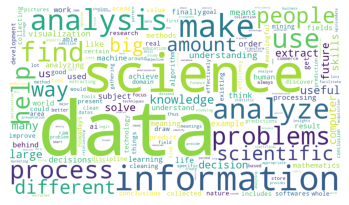

In [8]:
from wordcloud import WordCloud

wcd = WordCloud(background_color="white", width=1400, height=800, margin=5)
wcdimg = wcd.generate_from_frequencies(dict(word2num))

import matplotlib.pyplot as plt

plt.imshow(wcdimg)
plt.axis("off")
